In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Pregnancies                   Embarazo
Glucose                       Glucosa
BloodPressure                 Presión arterial
SkinThickness                 Grosor de la pie
Insulin                       Insulina
BMI                           Imc
DiabetesPedigreeFunction      Diabetes Pedigrí Función
Función que asigna la probabilidad de padecer diabetes a partir de la historia familiar.
Age                           Edad                    
Outcome                       Resultado

In [7]:
columnas = df.columns
columnas_remplazar= []
for c in columnas:
    cuantas = df[df[c] == 0][c].count()
    if cuantas > 0 and c != 'Outcome':

        columnas_remplazar.append(c)
        print(f"Esta columna {c} tiene {cuantas} filas a 0")

Esta columna Pregnancies tiene 111 filas a 0
Esta columna Glucose tiene 5 filas a 0
Esta columna BloodPressure tiene 35 filas a 0
Esta columna SkinThickness tiene 227 filas a 0
Esta columna Insulin tiene 374 filas a 0
Esta columna BMI tiene 11 filas a 0


In [8]:
columnas_remplazar

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [9]:
df_nan = df.copy()
df_nan[columnas_remplazar] = df[columnas_remplazar].replace(0,np.nan)
df_nan

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [10]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               657 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


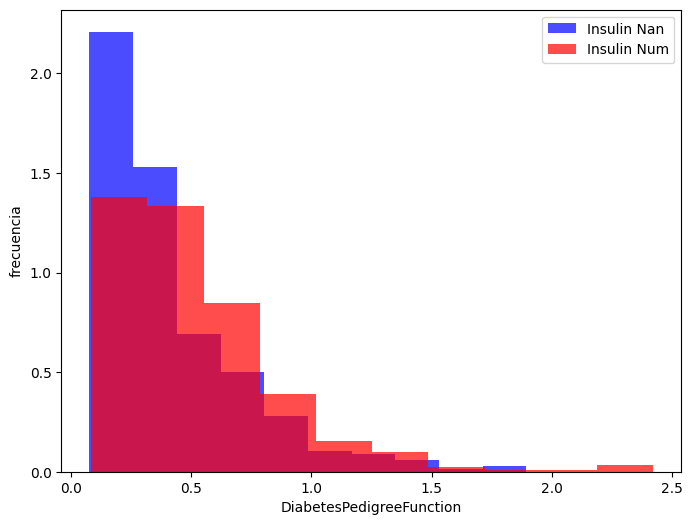

In [12]:
df_insulin_num= df_nan[df_nan['Insulin'].notna()]
df_insulin_nan = df_nan[df_nan['Insulin'].isna()]
plt.figure(figsize=(8,6))
plt.hist(df_insulin_nan['DiabetesPedigreeFunction'],density = True,bins=10,alpha= 0.7,color= 'blue',label= 'Insulin Nan')
plt.hist(df_insulin_num['DiabetesPedigreeFunction'],density= True,bins=10,alpha= 0.7, color='red',label='Insulin Num')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('frecuencia')
plt.legend()
plt.show()